# Deep Neural Network for L-Layer

    * The first (L-1) Layers utilize the ReLU while the last one utilizes the sigmoid in the output Layer.

## Cat vs Noncat Dataset

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py

while initializing with random values, the scaling factor is critical, sometimes a constant product such as 0.001 would not work, a dimension related scaling might work better such as np.sqrt(layer_dims[i-1])

Sample data:
it is a 'non-cat' picture
Number of training examples: m_train = 209
Number of testing examples: m_test = 50


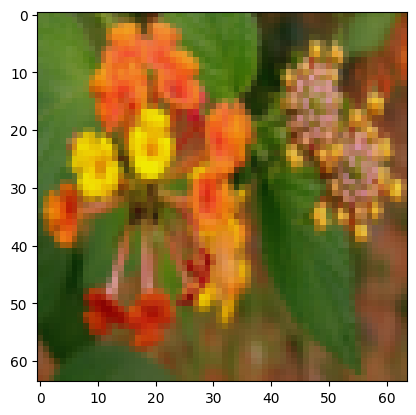

In [2]:
#load dataset
def load_data():
    f_train=h5py.File('../catvnoncat/train_catvnoncat.h5', 'r')
    f_test=h5py.File('../catvnoncat/test_catvnoncat.h5', 'r')

    # Add [:] to the end, in order to convert from h5 into nd.array
    train_set_x=f_train['train_set_x'][:]
    train_set_y=f_train['train_set_y'][:]
    test_set_x=f_test['test_set_x'][:]
    test_set_y=f_test['test_set_y'][:]
    classes=f_train['list_classes'][:]
    print("Sample data:")
    index=63
    plt.imshow(train_set_x[index])
    print ("it is a '"+ classes[(train_set_y[index])].decode("utf-8")+"' picture" )

    # Reshape and normalize the dataset
    X_train=train_set_x.reshape(train_set_x.shape[0],-1).T/255
    X_test=test_set_x.reshape(test_set_x.shape[0],-1).T/255
    Y_train=train_set_y.reshape(1,train_set_y.shape[0])
    Y_test=test_set_y.reshape(1,test_set_y.shape[0])
    
    return X_train,Y_train, X_test,Y_test

X_train,Y_train,X_test,Y_test=load_data()
m_train=X_train.shape[1]
m_test=X_test.shape[1]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))

# Activation Functions and Derivatives

In [3]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    return A

def relu(Z):
    A = np.maximum(0,Z)
    return A

def relu_backward(dA, Z):
    dZ = np.array(dA, copy=True)
    dZ[Z<=0] = 0
    assert (dZ.shape == Z.shape)
    return dZ

def sigmoid_backward(dA, Z):
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ

# Initialize Parameters

In [68]:
def initialize_parameters(layers_dims):
    np.random.seed(1)
    params = {}
    L = len(layers_dims) 
    for l in range(1, L):
        # params['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) / np.sqrt(layers_dims[l-1]) #*0.01
        params['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])
        params['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return params

# Compute Cost

In [5]:
def  compute_cost(A,Y):
    m = Y.shape[1]
    cost = (1./m) * (-np.dot(Y,np.log(A).T) - np.dot(1-Y, np.log(1-A).T))
    cost = np.squeeze(cost) 
    return cost

In [6]:
def forward_prop_one(A_prev,W,b,activation):
    Z = W.dot(A_prev) + b
    if activation=="relu":
        A= relu(Z)
    if activation=="sigmoid":
        A= sigmoid(Z)
    return A,Z

pass

In [7]:
def back_prop_one(dA,cache,activation):
    A_prev,Z,W,b=cache
    if activation=="sigmoid":
        dZ = sigmoid_backward(dA,Z)
    if activation=="relu":
        dZ = relu_backward(dA,Z)
    m = A_prev.shape[1]
    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    return dA_prev, dW, db 

In [8]:
def forward_prop_L(X_train,params):
    caches = []
    A = X_train
    L = len(params) // 2   
    for l in range(1, L):
        A_prev = A 
        W=params['W' + str(l)]
        b=params['b' + str(l)]
        A,Z=forward_prop_one(A_prev,W,b,activation="relu")
        cache = (A_prev,Z,W,b)
        caches.append(cache)
    A_prev = A 
    W=params['W' + str(L)]
    b=params['b' + str(L)]
    AL,Z=forward_prop_one(A_prev,W,b,activation="sigmoid")
    cache = (A_prev,Z,W,b)
    caches.append(cache)
    return AL, caches

pass

In [9]:
def back_prop_L(A,Y,caches):
    grads = {}
    L = len(caches) 
    m = A.shape[1]
    Y = Y.reshape(A.shape)
    dAL = - (np.divide(Y, A) - np.divide(1 - Y, 1 - A)) 
    current_cache = caches[L-1]
    dA_prev, dW, db=back_prop_one(dAL,current_cache,"sigmoid")
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = dA_prev, dW, db
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev, dW, db=back_prop_one(dA_prev,current_cache,"relu")
        grads["dA" + str(l+1)], grads["dW" + str(l+1)], grads["db" + str(l+1)] =  dA_prev, dW, db 
    return grads

pass

In [10]:
def update_parameters(params,grads,learning_rate):
        L = len(params) // 2 
        for l in range(1,L+1):
            params["W" + str(l)] = params["W" + str(l)] - learning_rate * grads["dW" + str(l)]
            params["b" + str(l)] = params["b" + str(l)] - learning_rate * grads["db" + str(l)]
        return params

In [11]:
def predict(X, params):
    AL, caches=forward_prop_L(X,params)
    return (AL>0.5)

In [ ]:
# load data
X_train,Y_train,X_test,Y_test=load_data()

# initialize parameters
layers_dims = [12288, 20, 7, 5, 1]
learning_rate=0.01
num_iterations=2500
costs=[]
params=initialize_parameters(layers_dims)

# iterations, epochs
for iter in range(num_iterations):
    # forward propagation
    AL,caches=forward_prop_L(X_train,params)

    #compute cost 
    cost=compute_cost(AL,Y_train)
    costs.append(cost)
    if iter%100==0:
        print("cost at iter ",str(iter)," : ",str(cost))

    # backward_propagation
    grads=back_prop_L(AL,Y_train,caches)

    # update parameters
    params=update_parameters(params,grads,learning_rate)

Y_train_predict =predict(X_train,params)
Y_test_predict =predict(X_test,params)
train_accuracy=100 - np.mean(np.abs(Y_train_predict - Y_train)) * 100
test_accuracy=100 - np.mean(np.abs(Y_test_predict - Y_test)) * 100

# Print train/test Errors
print("train accuracy: {} %".format(train_accuracy))
print("test accuracy: {} %".format(test_accuracy))
            

## Moons Dataset

(2, 268)
(1, 268)
(2, 132)
(1, 132)


(array([[ 1.15047904e-01, -1.56649522e-01,  7.93083107e-01,
          4.81057102e-01,  1.66790226e+00, -7.12189751e-02,
          8.58905297e-01, -2.74372148e-02,  1.00096516e+00,
          2.43098310e-01,  9.99913623e-01,  1.19346366e-01,
         -8.35621917e-01,  5.49723691e-01,  1.92241592e+00,
          1.43612639e-01,  2.18395752e-01,  1.11895936e+00,
          1.23382487e+00,  2.57774672e-01, -4.05006544e-01,
          8.48971669e-01, -4.51185437e-01,  9.79760007e-01,
         -7.66788941e-01,  5.89973217e-01,  8.45427163e-01,
          6.17850065e-01,  4.92177076e-01,  7.12776900e-01,
          2.45060835e-01,  9.94118856e-01,  9.67192508e-01,
          2.55431149e-01,  8.21195404e-01, -1.97978797e-01,
         -8.28026359e-01,  6.16304050e-01, -2.97015712e-01,
          9.31736605e-01,  2.92835453e-01,  9.54916847e-01,
          1.51297851e+00, -2.81503864e-01,  9.83648791e-01,
          3.44463010e-01,  1.58208625e+00, -1.34019967e-01,
         -1.01661741e+00,  6.02708883e-0

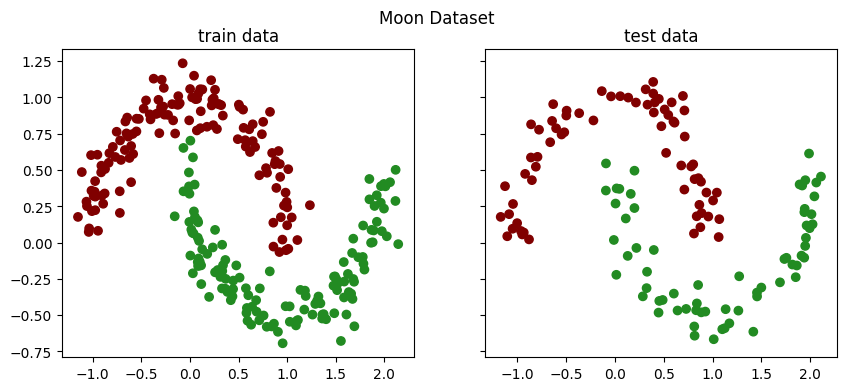

(2, 268)
(1, 268)
(2, 132)
(1, 132)
cost at iter  0  :  0.8735959570535167
cost at iter  100  :  0.6960352460305508
cost at iter  200  :  0.6920337456830241
cost at iter  300  :  0.6909764637411133
cost at iter  400  :  0.6901357454259273
cost at iter  500  :  0.6896376642699201
cost at iter  600  :  0.688971619604534
cost at iter  700  :  0.688388743168816
cost at iter  800  :  0.688004208513696
cost at iter  900  :  0.687061791428643
cost at iter  1000  :  0.6863341451659233
cost at iter  1100  :  0.6857136295763965
cost at iter  1200  :  0.6849939504602411
cost at iter  1300  :  0.684265455809334
cost at iter  1400  :  0.6835230387623771
cost at iter  1500  :  0.6827593762263768
cost at iter  1600  :  0.6820353160733632
cost at iter  1700  :  0.6813081823997327
cost at iter  1800  :  0.6802464128549552
cost at iter  1900  :  0.6775231865708456
cost at iter  2000  :  0.6755673629510228
cost at iter  2100  :  0.6741120463985846
cost at iter  2200  :  0.6731059436435852
cost at iter  2

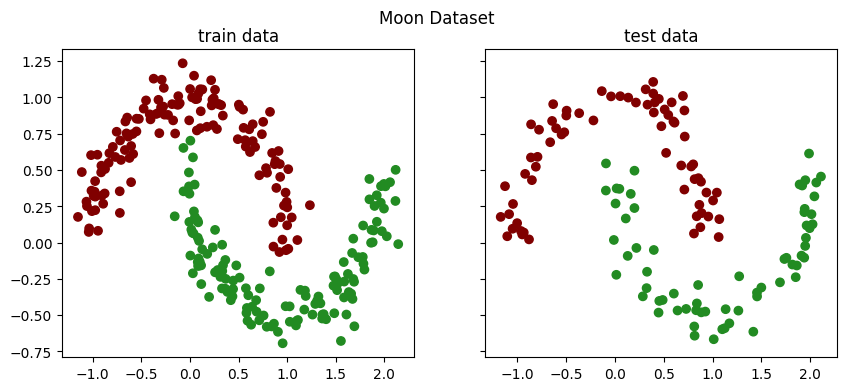

In [70]:
# load data
X_train, Y_train, X_test, Y_test=load_moon_dataset()

# initialize parameters
layers_dims = [2,5,3,1]
learning_rate=0.1
num_iterations=5000
costs=[]
params=initialize_parameters(layers_dims)

# iterations, epochs
for iter in range(num_iterations):
    # forward propagation
    AL,caches=forward_prop_L(X_train,params)

    #compute cost 
    cost=compute_cost(AL,Y_train)
    costs.append(cost)
    if iter%100==0:
        print("cost at iter ",str(iter)," : ",str(cost))

    # backward_propagation
    grads=back_prop_L(AL,Y_train,caches)

    # update parameters
    params=update_parameters(params,grads,learning_rate)

Y_train_predict =predict(X_train,params)
Y_test_predict =predict(X_test,params)
train_accuracy=100 - np.mean(np.abs(Y_train_predict - Y_train)) * 100
test_accuracy=100 - np.mean(np.abs(Y_test_predict - Y_test)) * 100

# Print train/test Errors
print("train accuracy: {} %".format(train_accuracy))
print("test accuracy: {} %".format(test_accuracy))
            